In [1]:
#importa bibliotecas relevantes
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
%matplotlib inline

In [2]:
#groups = pickle.load(open("groups.p", "rb" ))
#data_filtered = pd.read_csv("data_filtered.csv")
friends_filter = pd.read_csv("fb_friendship_filtered.csv")

In [3]:
print friends_filter.shape
friends_filter.head()

(181509, 3)


,Unnamed: 0,friend1,friend2
0,0,cea978a10263161edc239ab80bd7673c,0ff6c8236f5e08f33a3ae28a1e2541fe
1,1,8ea81eab9e743c224847a1e6dac453fb,7e16d2acb54a7e15bacc25d8f7b83bce
2,2,6d111bd69e41e93a491af89d76ed52a1,1d7354b7548aa353f784f95a0d125f24
3,3,fb52185b7e5ed76c2a290d382da362a6,c6dafac2963e89400c7bb33b3c40a148
4,4,4fe5543d03cc5155b800be1d34bc2e89,fe428f422f0cf5d630803467ad654cdb


In [4]:
#importa biblioteca de grafos
import networkx as nx

In [35]:
del(G)

In [36]:
G=nx.Graph()

#constrói grafo não-direcional com os relacionamentos
G.add_edges_from(friends_filter[["friend1","friend2"]].as_matrix())

In [37]:
#CALCULAR MEDIDAS DE CENTRALIDADE


%time degree_measure = nx.degree_centrality(G)
%time eigen_measure = nx.eigenvector_centrality_numpy(G)
%time closeness_measure = nx.closeness_centrality(G)
%time katz_measure = nx.katz_centrality(G)
#%time harmonic_measure = nx.harmonic_centrality(G)
# TENTAR COM K = 10.000
#%time betweeness_measure = nx.betweenness_centrality(G, k=1000)


Wall time: 834 ms
Wall time: 5.86 s


KeyboardInterrupt: 

In [10]:
data_filtered = pd.read_csv("data_filtered.csv")

In [28]:
data_filtered["degree"] = data_filtered["userid"].isin(
    pd.DataFrame(degree_measure.items()).nlargest(100,1)[0])
data_filtered["eigen"] = data_filtered["userid"].isin(
    pd.DataFrame(eigen_measure.items()).nlargest(100,1)[0])


#data_filtered["closeness"] = data_filtered["userid"].isin(
#    pd.DataFrame(closeness_measure.items()).nlargest(100,1)[0])

#data_filtered["katz"] = data_filtered["userid"].isin(
#    pd.DataFrame(katz_measure.items()).nlargest(100,1)[0])

#data_filtered["harmonic"] = data_filtered["userid"].isin(
#    pd.DataFrame(harmonic_measure.items()).nlargest(100,1)[0])

#data_filtered["betweeness"] = data_filtered["userid"].isin(
#    pd.DataFrame(betweeness_measure.items()).nlargest(100,1)[0])

In [29]:
import seaborn as sns
sns.set_style("whitegrid")

In [30]:
df = pd.melt(data_filtered[["ope","con","ext","agr","neu",
                    "gender", "degree", "eigen"]], 
             id_vars=["gender", "degree", "eigen"], 
             var_name='OCEAN', value_name='value')

# "degree", "eigen", "closeness", "katz", "harmonic", "betweeness"

In [31]:
df.head()

,gender,degree,eigen,OCEAN,value
0,1.0,False,False,ope,5.00
1,0.0,False,False,ope,4.25
2,0.0,False,False,ope,3.75
3,0.0,False,False,ope,4.25
4,1.0,False,False,ope,3.25


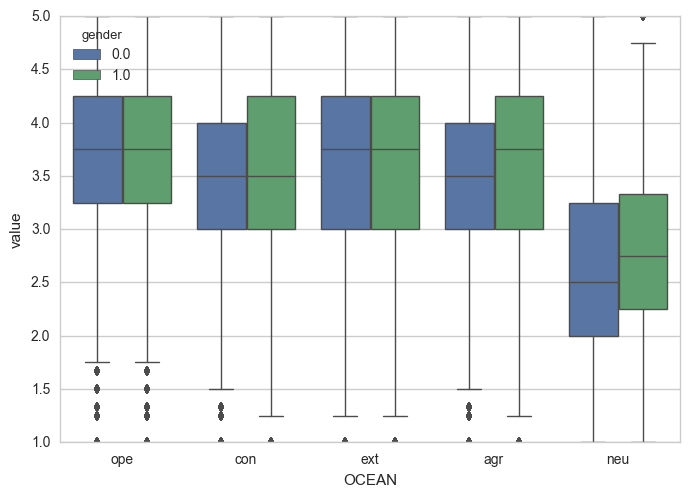

In [32]:
ax = sns.boxplot(x="OCEAN", y="value", hue="gender", data=df, linewidth=1)

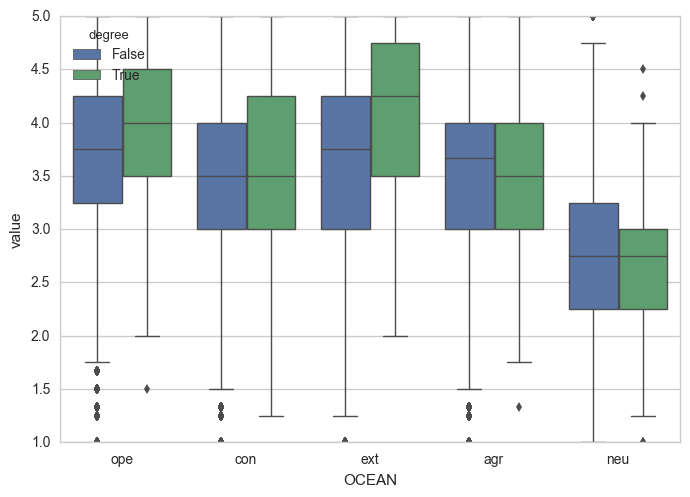

In [33]:
ax = sns.boxplot(x="OCEAN", y="value", hue="degree", data=df, linewidth=1)

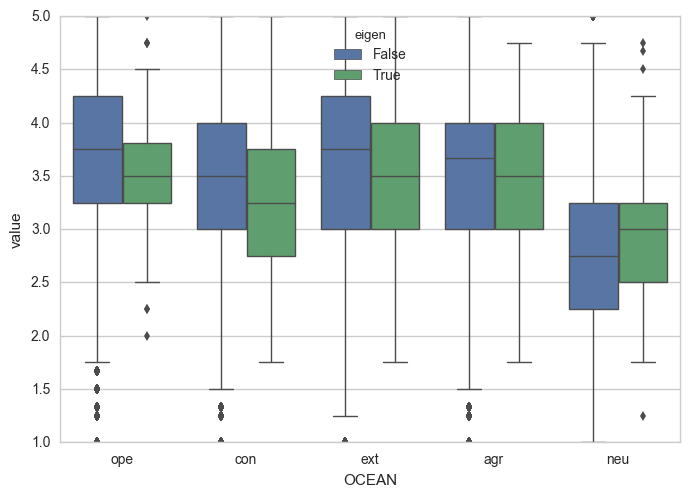

In [34]:
ax = sns.boxplot(x="OCEAN", y="value", hue="eigen", data=df, linewidth=1)

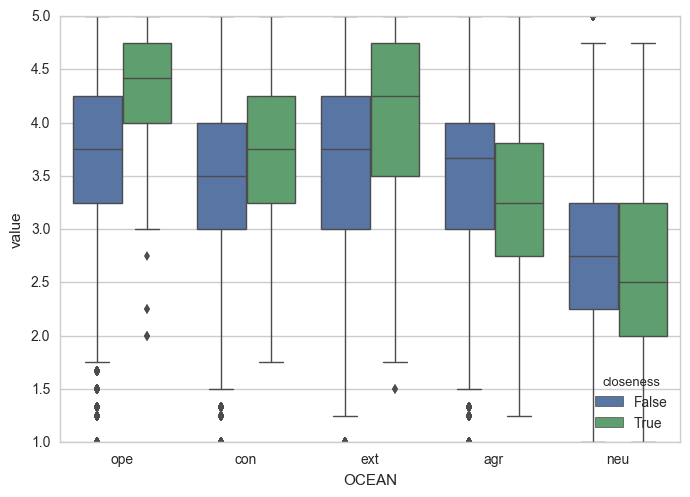

In [58]:
#ax = sns.boxplot(x="OCEAN", y="value", hue="closeness", data=df, linewidth=1)

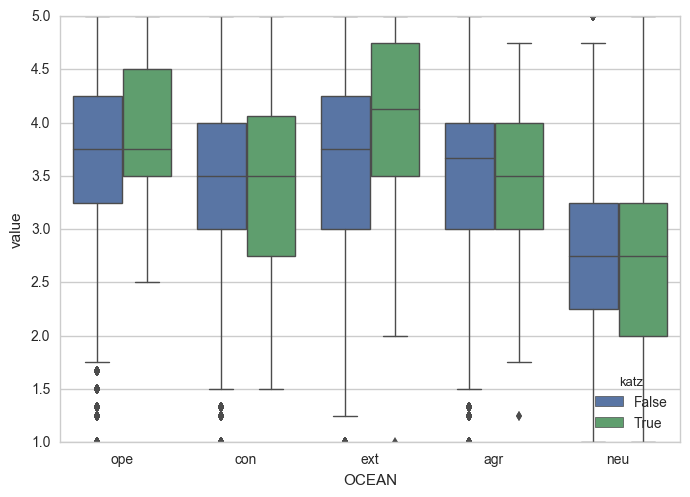

In [57]:
#ax = sns.boxplot(x="OCEAN", y="value", hue="katz", data=df, linewidth=1)

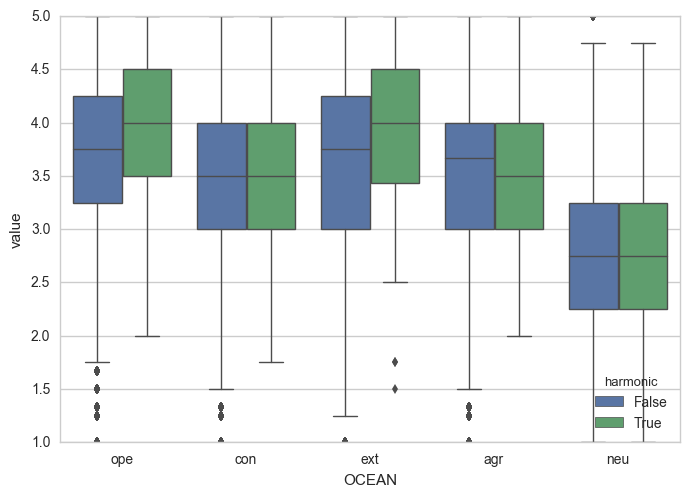

In [56]:
#ax = sns.boxplot(x="OCEAN", y="value", hue="harmonic", data=df, linewidth=1)

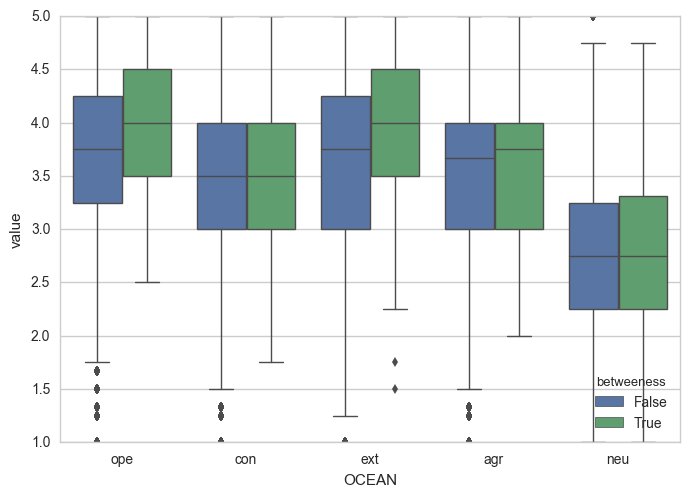

In [53]:
#ax = sns.boxplot(x="OCEAN", y="value", hue="betweeness", data=df, linewidth=1)